# 4. Seaborn
## b) Categorical Plots
You can find details on the below categorical plots here:
* https://seaborn.pydata.org/generated/seaborn.catplot.html

Types of plot:
* Catplot()
* Boxplot()
* Stripplot()
* Swarmplot()
* etc...

In [1]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# show figures in notebook
%matplotlib inline

# load iris dataset
iris = sns.load_dataset('iris')

# peek at data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# load titanic data
titanic = sns.load_dataset('titanic')

# peek at data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# load tips data
tips = sns.load_dataset('tips')

# peek at data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Catplot (i.e. categorical plot) and Swarmplot
* Provide a catplot with a categorical variable and it will split the points out based on the different categories within the variable.

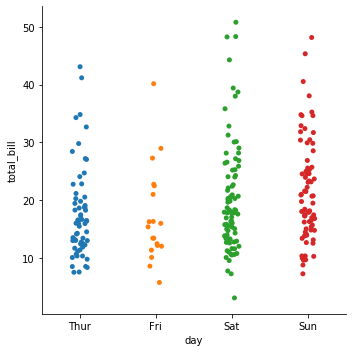

In [4]:
# plot data in catplot
sns.catplot(x = 'day', y = 'total_bill', data = tips)

* You can flip the axis by literally providing the categorical variable on the x axis instead of the y for example.
* You can switch off 'jitter' which normally presents the data in a non-overlapping way.

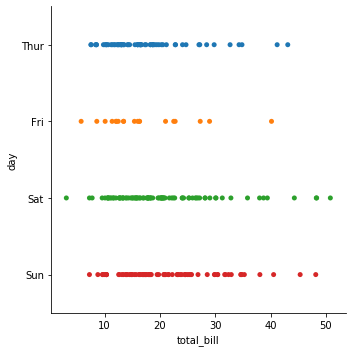

In [6]:
# plot data in catplot (switch axes)
sns.catplot(x = 'total_bill', y = 'day', data = tips, jitter = False)

* By default the data is provided in a 'strip' plot (you can check this using shift + double tab and looking at the 'kind' attribute).
* There are other options, such as 'swarm' below.
* Swarm plots are similar to strip plots with jitter on, except they have a slightly different non-overlapping algorithm which presents overlapping points in a fan/tree formation.
* You can also bring in hue again to differentiate data within each category.

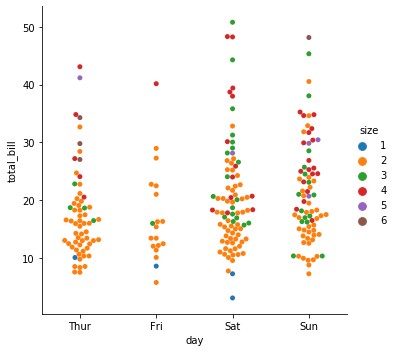

In [12]:
# plot data in catplot (switch axes)
sns.catplot(x = 'day', y = 'total_bill', data = tips,
            kind = 'swarm', hue = 'size')

* You can manually adjust the order of values on the categorical variable axis using the 'order' attribute as below.
* For only a few variable values this is simply via manual typing, but if there are many values (e.g. social classes from A to Z) then you could be smarter with your list sorting of the values beforehand and then pass the pre-sorted list.

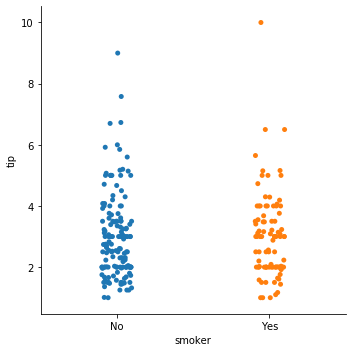

In [11]:
# plot data looking at smoker y/n
sns.catplot(x = 'smoker', y = 'tip', data = tips, order = ['No', 'Yes'])

### Boxplot
* Boxplots show min and max (lines at top and bottom), 25% and 75% (a.k.a 1st and 3rd quartiles) as the top and bottom of the box, median (line through middle of box) and then any outliers based on default settings.
* Dodge is similar to jitter for the swarm/catplots, you can set it to False and you will allow the boxplots to overlap for the different categorical variable values.

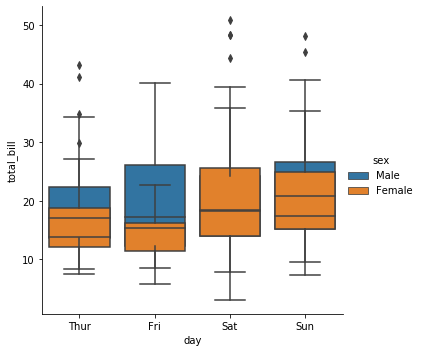

In [18]:
# plot data as boxplot
sns.catplot(x = 'day', y = 'total_bill', kind = 'box',
            hue = 'sex', data = tips, dodge = False)

In [19]:
# load new dataset
diamonds = sns.load_dataset('diamonds')

# peek at data
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* You can customise boxplots quite nicely, in the below example we've used 'boxen' (boxenplot) which is like a box plot but with more quantiles split out to give more detail on the tail values.
* We've also sorted by another categorical variable in the data; color.

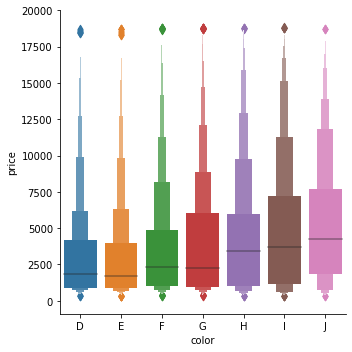

In [22]:
# plot data as boxenplot
sns.catplot(x = 'color', y = 'price', kind = 'boxen',
            data = diamonds.sort_values('color'))

### Violin Plots
* These are similar to boxplots but show smoother transitions of data in place of a box and use the width of the shape proportional to the amount of data at these points.
* You can see that there is a small black boxplot within the violin plot anyway for extra reference.

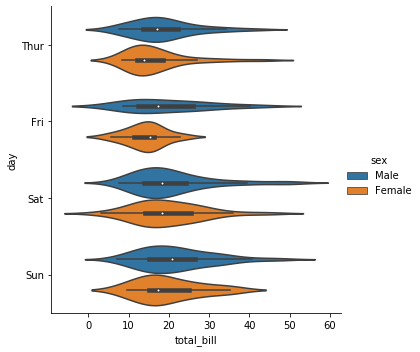

In [24]:
# plot data as violin plot
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex',
            kind = 'violin', data = tips)

* You can use the 'split' parameter (below) to merge the violin plots so that there is just one per categorical value.
* We've also used 'stick' below to show each individual data point as well, rather than just the inferred connection of the area.

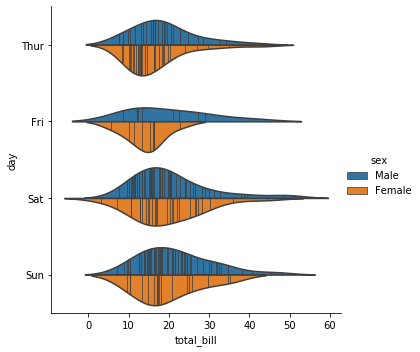

In [26]:
# plot data as violin plot
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex',
            kind = 'violin', data = tips, split = True, inner = 'stick')

* You can combine multiple plot types.
* Below we have first created a violin plot and assigned it to a variable, then we create a swarmplot of the same data and set the axis as the previous object's axis to show both the swarm and violin plot together.
* The 'ax' argument refers to the axis you are going to draw the plot onto, by assigning the axis of another visualisation model you are essentially combining the two plots.

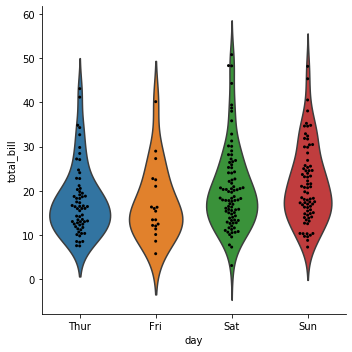

In [27]:
# assign violin plot to variable
g = sns.catplot(x = 'day', y = 'total_bill', kind = 'violin',
                inner = None, data = tips)

# create swarm plot with a violin plot inside it
sns.swarmplot(x = 'day', y = 'total_bill', color = 'k',
              size = 3, data = tips, ax = g.ax)

* The below bar plot represents a categorical variable ('survived' with either 1 or 0 as an option) as a distribution.
* By this I mean that the value it shows on the bar is the probability of getting a certain value, so the higher the bar, the closer the average is to 1, whilst the larger the black bar at the top middle of the bar, the less certain/confident we are that this estimate is accurate based on any one point from the data.

In [28]:
# peek at titanic data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


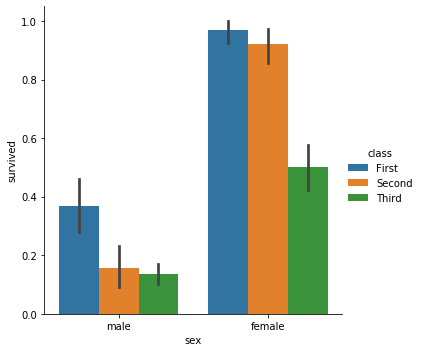

In [29]:
# plot data as a bar plot/histogram
sns.catplot(x = 'sex', y = 'survived', hue = 'class',
            kind = 'bar', data = titanic)

* Below we're simply plotting the count of one variable and selecting custom palettes to give a colour gradient.

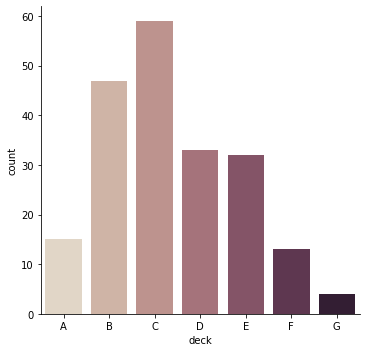

In [38]:
# plot different data and tweak appearance/colour scheme etc.
sns.catplot(x = 'deck', kind = 'count', palette = 'ch:0.25',
            data = titanic)

### Pointplot
* These give you an indication of the variation between the different categorical values.
* In the below example, the connecting lines illustrate how drastic a change there is in chance of survival between males and females on the titanic (clearly women had a higher chance, probably based on the loading of women/mothers and children onto the first lifeboats).

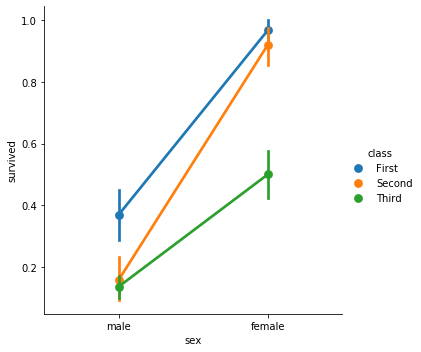

In [39]:
# plot data in pointplot
sns.catplot(x = 'sex', y = 'survived', hue = 'class',
            kind = 'point', data = titanic)